Data Importing and Pre-processing

Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

Clean, wrangle, and handle missing data

Transform data appropriately using techniques such as aggregation, normalization, and feature construction

Reduce redundant data and perform need based discretization

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
# Importing the data from it's CSV and TXT files, stored in several nested folders in my Desktop

dataset1 = pd.read_csv('/Users/kalelcoleman/Desktop/ADS 500B/Final project data sets/Dataset 1 (Bank Marketing)/bank_marketing.csv',
                               sep=';')

with open('/Users/kalelcoleman/Desktop/ADS 500B/Final project data sets/Dataset 1 (Bank Marketing)/README.txt', 'r') as file:
    readme_content = file.read()

dataset1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Displaying the data's associated README.txt file

display(Markdown(readme_content))

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
The dataset is ordered by date (from May 2008 to November 2010).

Origin: UCI Machine Learning Repository
File Type: CSV
File Size: 3.7 MB
Modeling Problem: Classification
Missing Values: Yes

Dataset variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  17 - deposit: has the client subscribed a term deposit? (binary: "yes","no") (dependent variable)


In [6]:
# Below is the dimension of the data frame, as well as each column's data type and its number of Non-Null entries

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


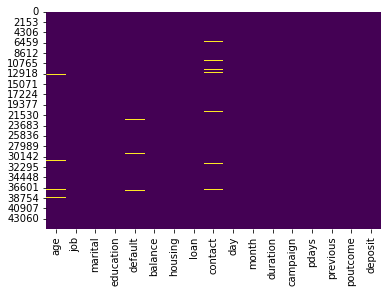

In [7]:
# Quick visualization of NA values

sns.heatmap(dataset1.isna(), cbar=False, cmap='viridis')
plt.show()

In [8]:
# Taking a look at all rows with at least one NA value

data_na = dataset1[dataset1.isna().any(axis=1)]
data_na

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
16,45.0,admin.,single,unknown,NaN,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
21,NaN,management,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,no
22,32.0,blue-collar,single,primary,NaN,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no
28,NaN,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,22.0,student,single,secondary,NaN,2488,no,no,cellular,8,nov,449,2,38,10,other,yes
45158,NaN,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45166,41.0,unemployed,single,tertiary,no,79,no,no,NaN,9,nov,394,1,390,2,success,yes
45170,NaN,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no


In [64]:
# As one may see, we must define a range for the balance column to use .groupby() meaningfully

testing = dataset1.copy()

testing.groupby(['job', 'marital', 'education', 'balance', 'housing', 'loan']).mean().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32198 entries, ('admin.', 'divorced', 'primary', -347, 'yes', 'no') to ('unknown', 'single', 'unknown', 18881, 'no', 'no')
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       31459 non-null  float64
 1   day       32198 non-null  float64
 2   duration  32198 non-null  float64
 3   campaign  32198 non-null  float64
 4   pdays     32198 non-null  float64
 5   previous  32198 non-null  float64
dtypes: float64(6)
memory usage: 1.7+ MB


In [10]:
dataset1['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [11]:
dataset1['contact'].describe()

count        43828
unique           3
top       cellular
freq         28410
Name: contact, dtype: object

In [12]:
dataset1['contact']

0          unknown
1          unknown
2          unknown
3          unknown
4              NaN
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object

Number of rows with missing values after cleaning data: 57


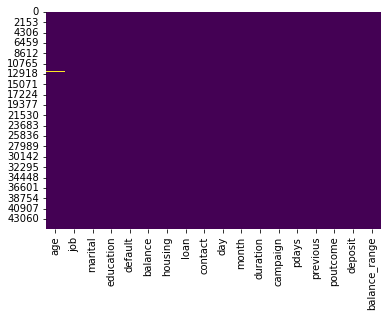

In [65]:
# Create balance_range column
balance_min = dataset1['balance'].min()
balance_max = dataset1['balance'].max()
balance_step = 500
bins = np.arange(balance_min, balance_max + balance_step, balance_step)
labels = [f'{i}-{i + balance_step - 1}' for i in bins[:-1]]
testing['balance_range'] = pd.cut(testing['balance'], bins=bins, right=False, labels=labels)

# Fill missing values
testing['contact'].fillna('unknown', inplace=True)

# Fill missing values in 'default' column based on reasonable conditions
testing.loc[testing['default'].isna() & (testing['balance'] < 0), 'default'] = 'yes'
testing.loc[testing['default'].isna() & (testing['balance'] < 100) & (testing['loan'] == 'yes'), 'default'] = 'yes'
testing.loc[testing['default'].isna(), 'default'] = 'no'

# Fill missing values in numeric columns with group means
numeric_column = ['age']
for col in numeric_column:
    testing[col] = testing.groupby(['job', 'marital', 'education', 'housing', 'loan', 'balance_range'])[col].transform(lambda x: x.fillna(x.mean()))

# Check if there are still any missing values
testing_na = testing[testing.isna().any(axis=1)]
print(f"Number of rows with missing values after cleaning data: {len(testing_na)}")

# Quick visualization of remaining NA values
sns.heatmap(testing.isna(), cbar=False, cmap='viridis')
plt.show()


In [14]:
# Professor requested 1% or below discarding of data. The remaining 57 rows may simply be dropped and are a result
# of being the only group of that kind

In [15]:
testing_na.count()

age               0
job              57
marital          57
education        57
default          57
balance          57
housing          57
loan             57
contact          57
day              57
month            57
duration         57
campaign         57
pdays            57
previous         57
poutcome         57
deposit          57
balance_range    57
dtype: int64

In [66]:
df = testing.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_range
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1981-2480
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,-19-480
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,-19-480
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1481-1980
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,-19-480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,481-980
45207,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1481-1980
45208,72.0,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,5481-5980
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,481-980


In [26]:
# First plotting all variables against if a deposit had been made, aka a success in the campagin 

# Label Encoding for binary and ordinal data
label_cols = ['default', 'housing', 'loan', 'deposit']
label_encoder = LabelEncoder()

for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for nominal categorical data
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

# Define numerical and categorical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = [col for col in df.columns if col not in numerical_cols]

# Define function to create pair plots and joint plots
def plot_data(df, numerical_cols, categorical_cols, target_col='deposit'):
    # Pair plot for numerical columns colored by target
    sns.pairplot(df, vars=numerical_cols, hue=target_col)
    plt.show()
    
    # Joint plots for numerical columns
    for col in numerical_cols:
        if col != target_col:
            sns.jointplot(x=col, y=target_col, data=df, kind='scatter')
            plt.show()

# Example usage
# plot_data(df, numerical_cols, categorical_cols)


/var/folders/90/fdx_svdd11q1w7mty7pgpdf40000gn/T/ipykernel_23519/4139360802.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


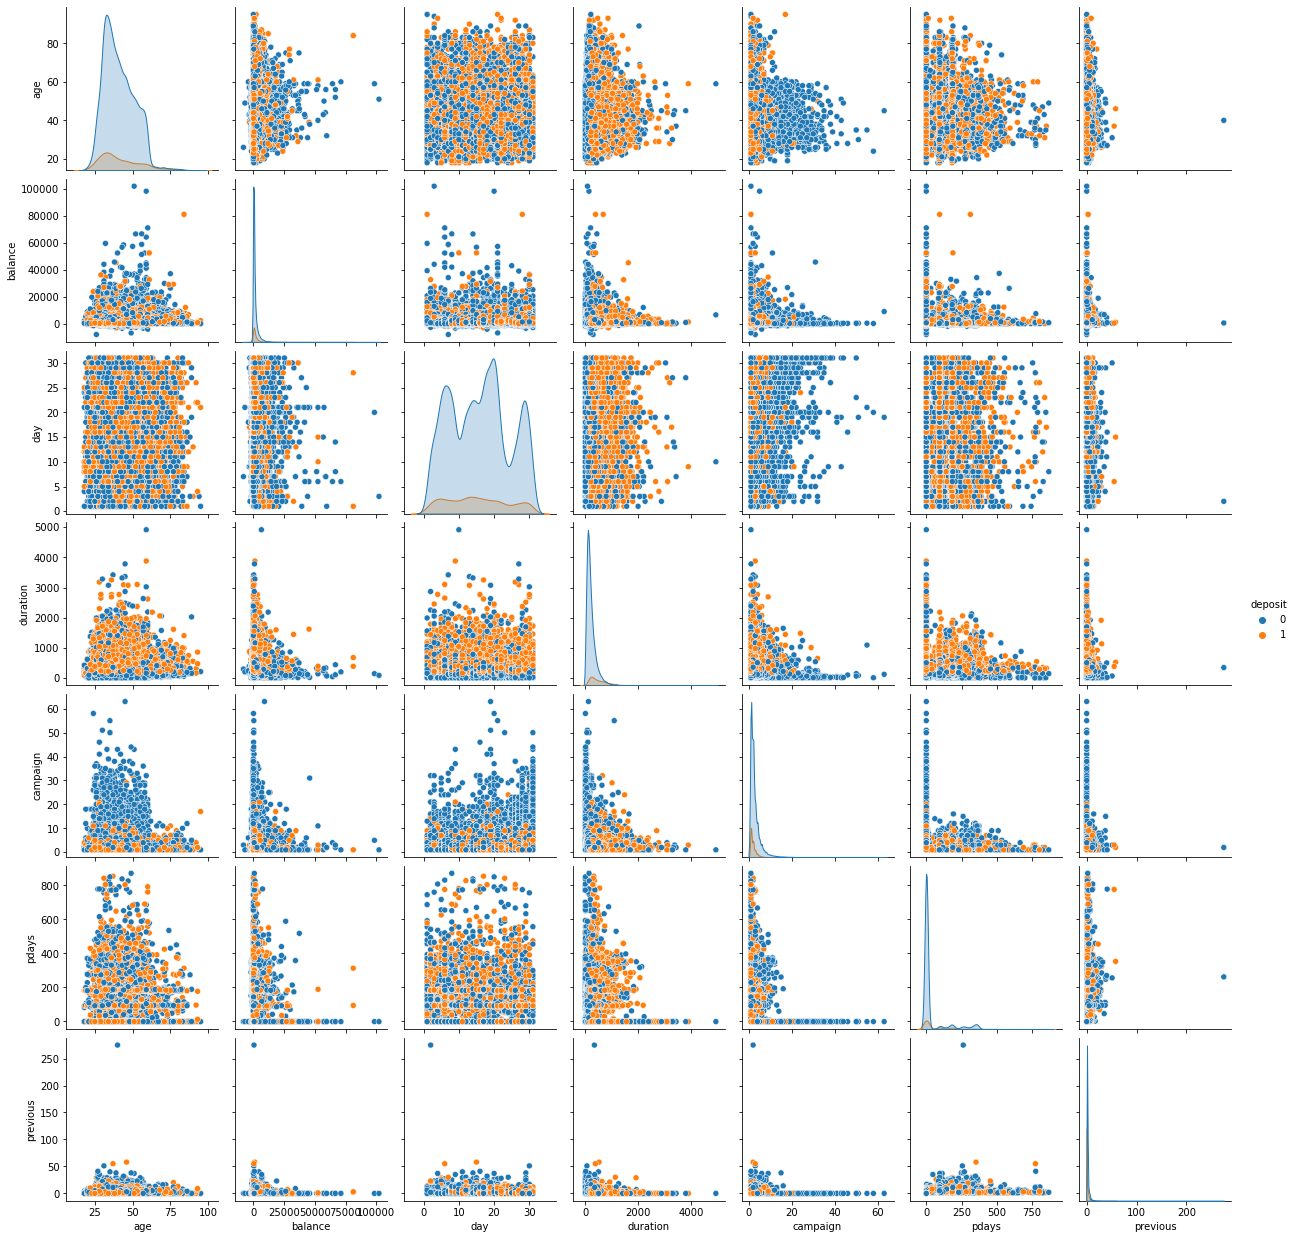

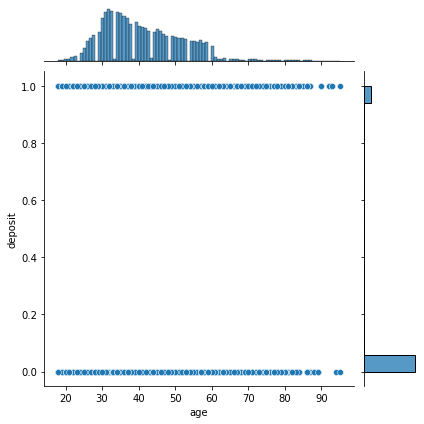

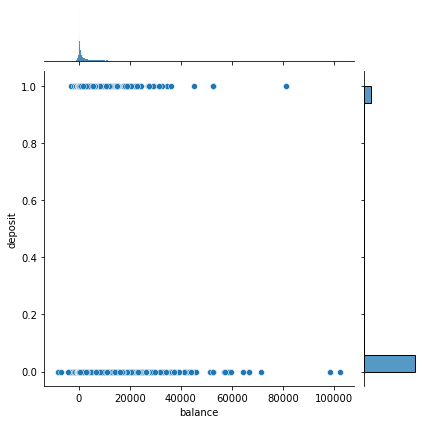

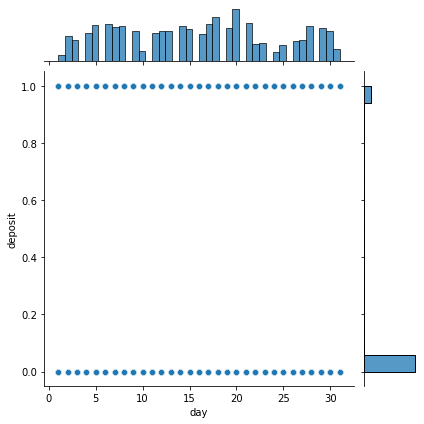

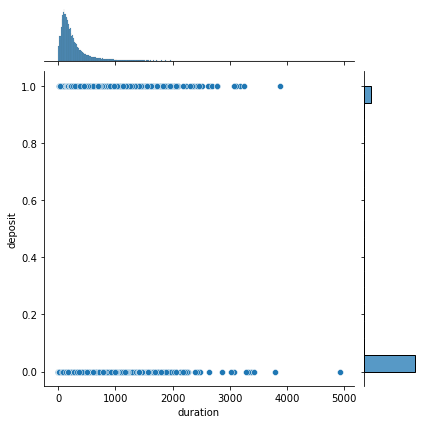

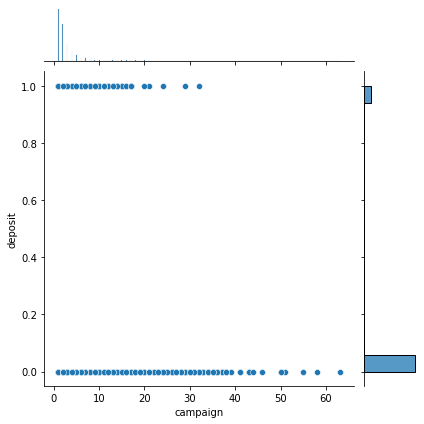

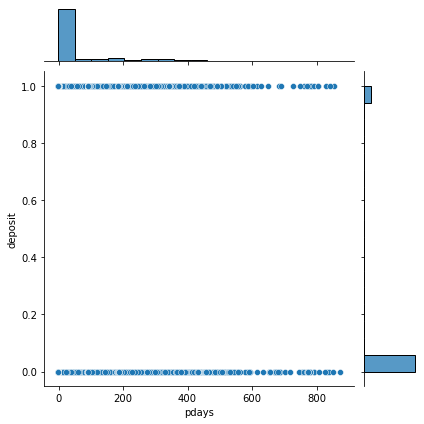

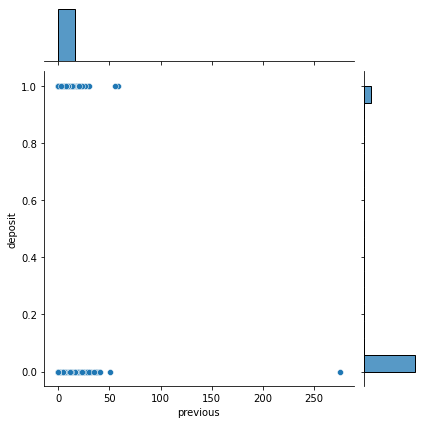

In [27]:
plot_data(df, numerical_cols, categorical_cols)

In [67]:

# Graphing the data segmented first by an age range


# Function to create age groups
def create_age_groups(df):
    bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
    labels = [f'{i}-{i+4}' for i in bins[:-1]]
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    return df

# Function to plot data based on grouped conditions
def plot_deposit_yes_age_groups(df, target_col='deposit'):
    # Ensure 'deposit' is coded as binary
    df[target_col] = df[target_col].apply(lambda x: 1 if x == 'yes' else 0)

    # Filter data for the target variable
    df_filtered = df[df[target_col] == 1].copy()
    
    # Create age groups
    df_filtered = create_age_groups(df_filtered)
    
    # Define numerical and categorical columns
    numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    categorical_cols = [col for col in df_filtered.columns if col not in numerical_cols and col != target_col]

    # Create pair plot
    sns.pairplot(df_filtered, vars=numerical_cols, hue='age_group', palette='Set1')
    plt.title('Pair Plot Colored by Age Group')
    plt.show()
    
    # Create joint plots
    for col in numerical_cols:
        if col != target_col:
            sns.jointplot(x=col, y=target_col, data=df_filtered, kind='scatter', hue='age_group', palette='Set1')
            plt.title(f'Joint Plot of {col} vs {target_col} Colored by Age Group')
            plt.show()

# Example usage
# Assuming `df` is your DataFrame and it's already encoded properly
# plot_groups(df)


/var/folders/90/fdx_svdd11q1w7mty7pgpdf40000gn/T/ipykernel_23519/3712830044.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
/var/folders/90/fdx_svdd11q1w7mty7pgpdf40000gn/T/ipykernel_23519/3712830044.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].apply(lambda x: 1 if x == 'yes' else 0)


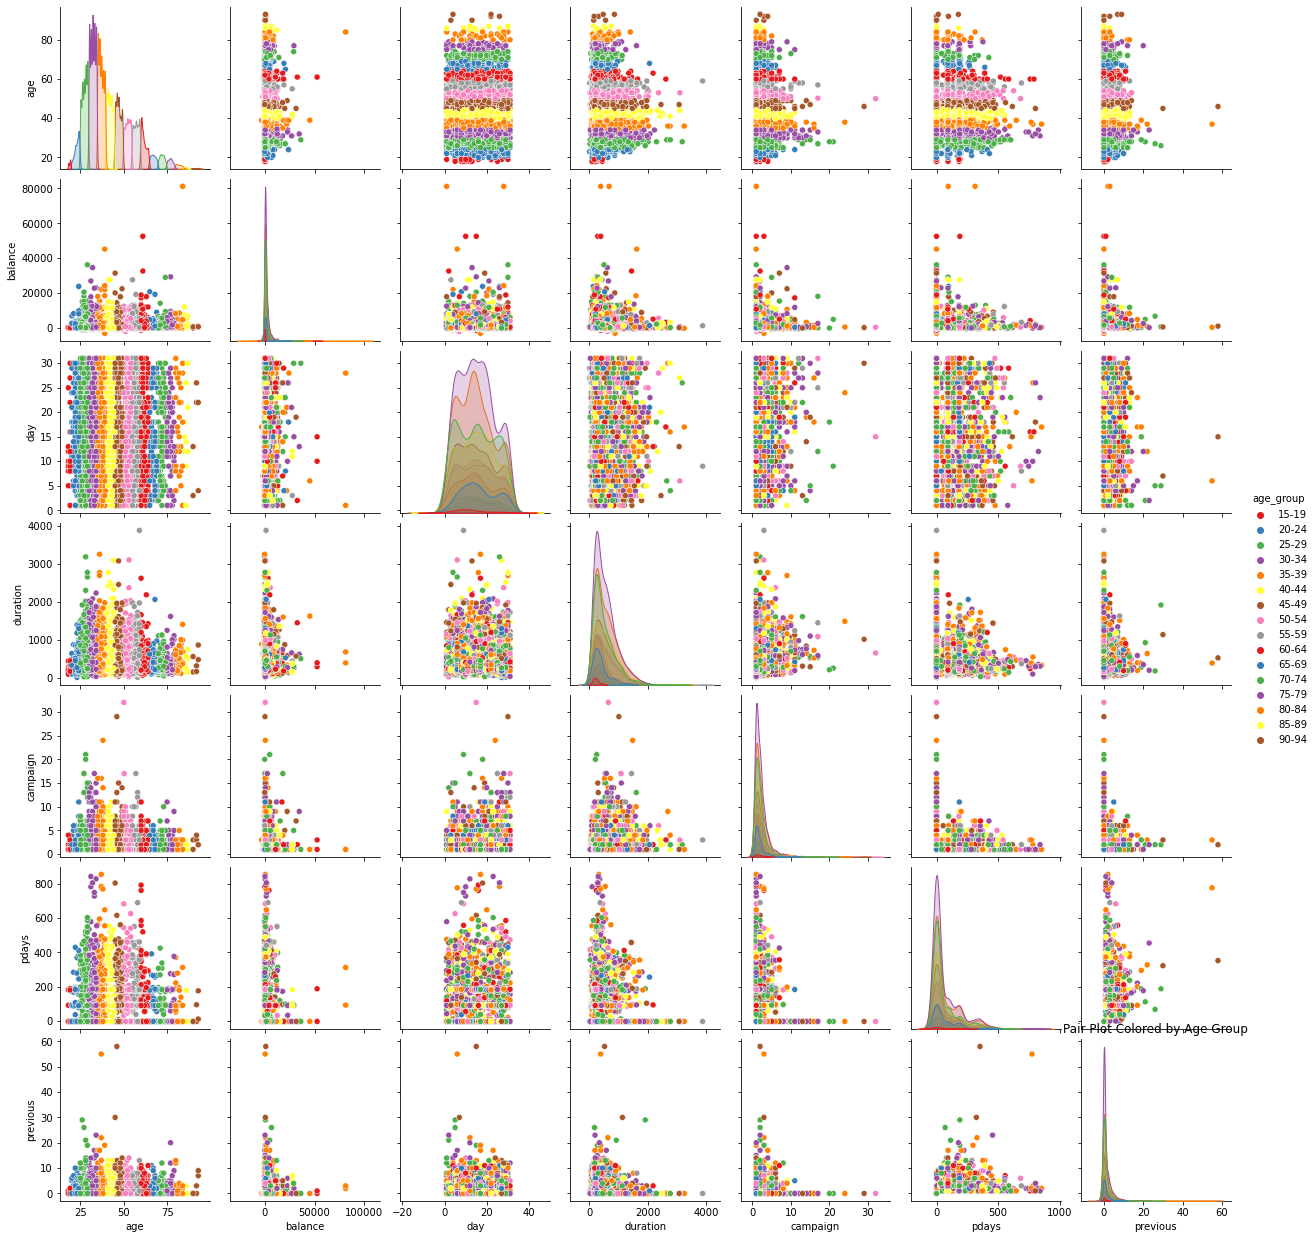

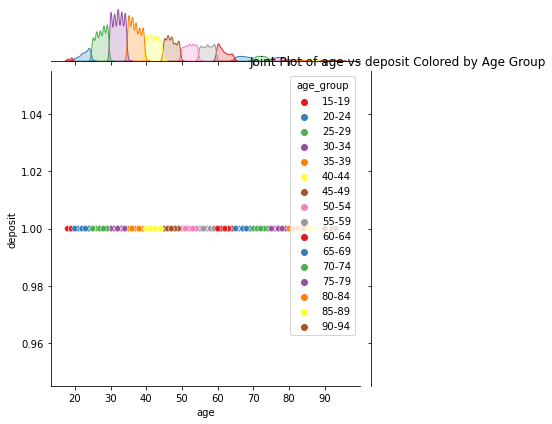

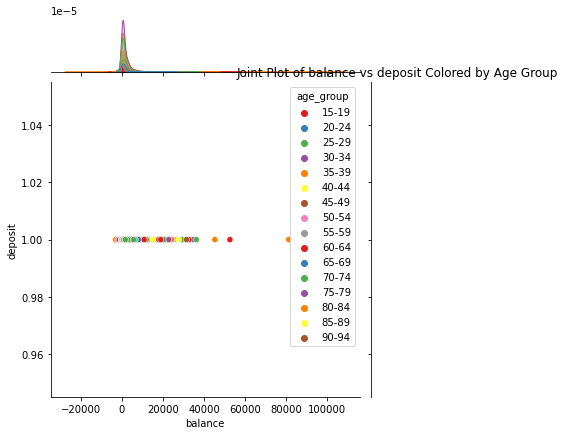

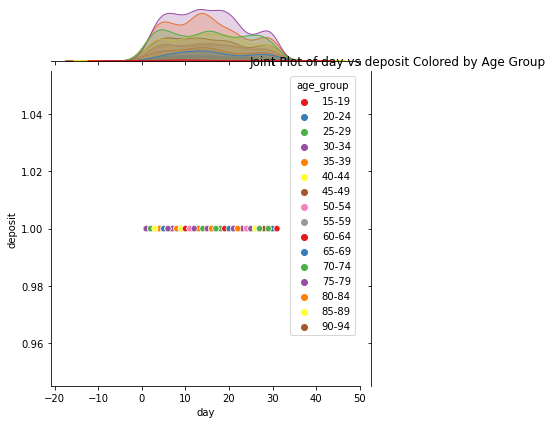

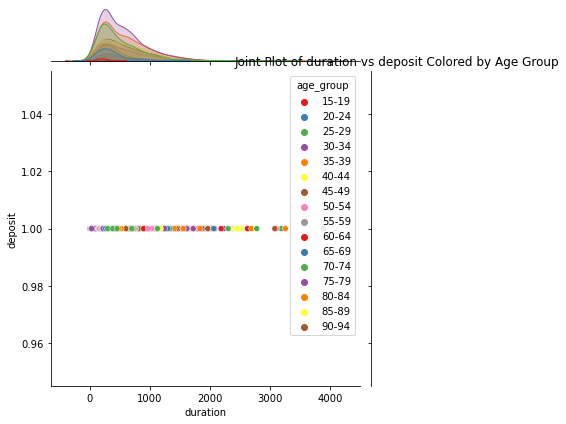

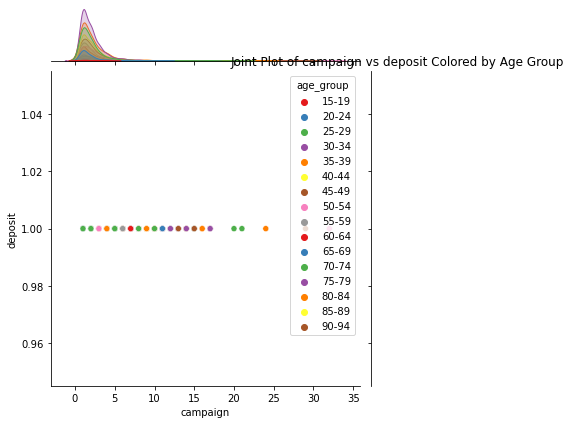

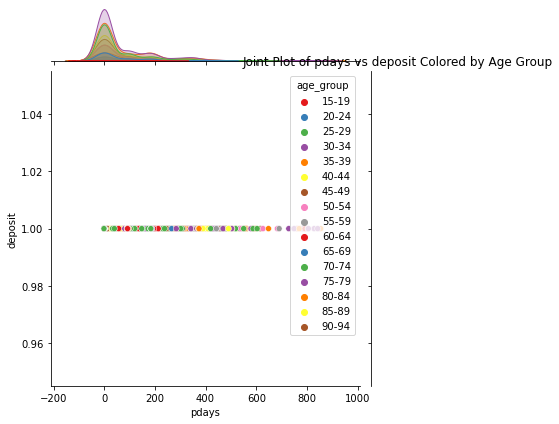

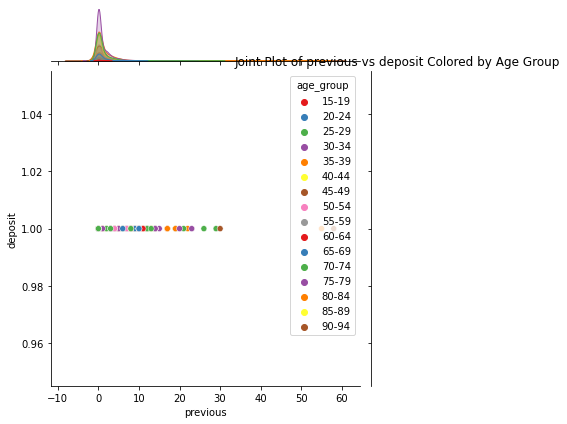

In [55]:
df = create_age_groups(df)
plot_deposit_yes_age_groups(df)

In [68]:

# Now plotting segmented data by profession


def create_job_groups(df):
    # Define job categories
    job_categories = ['admin.', 'unknown', 'unemployed', 'management', 'housemaid', 'entrepreneur',
                      'student', 'blue-collar', 'self-employed', 'retired', 'technician', 'services']
    
    # Ensure 'job' is one of the categories
    df['job_group'] = pd.Categorical(df['job'], categories=job_categories)
    return df

def plot_deposit_yes_job_groups(df, target_col='deposit'):
    # Ensure 'deposit' is coded as binary
    df.loc[:, target_col] = df[target_col].apply(lambda x: 1 if x == 'yes' else 0)
    
    # Filter data for the target variable (those who subscribed)
    df_filtered = df[df[target_col] == 1].copy()
    
    # Check if filtered data is empty
    if df_filtered.empty:
        print("Filtered data is empty. No rows match the filter condition.")
        return
    
    # Create age and job groups
    df_filtered = create_age_groups(df_filtered)
    df_filtered = create_job_groups(df_filtered)
    
    # Define numerical columns
    numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    
    # Create pair plot
    if len(df_filtered[numerical_cols]) > 0:
        sns.pairplot(df_filtered, vars=numerical_cols, hue='job_group', palette='Set1')
        plt.title('Pair Plot Colored by Job Group')
        plt.show()
    
    # Create joint plots
    for col in numerical_cols:
        if col != target_col:
            if col in df_filtered.columns:
                sns.jointplot(x=col, y=target_col, data=df_filtered, kind='scatter', hue='job_group', palette='Set1')
                plt.title(f'Joint Plot of {col} vs {target_col} Colored by Job Group')
                plt.show()
            else:
                print(f"Column '{col}' is missing in the DataFrame.")

# Example usage
# Assuming `df` is your DataFrame and it's already encoded properly
# plot_deposit_yes_job_groups(df)


/var/folders/90/fdx_svdd11q1w7mty7pgpdf40000gn/T/ipykernel_23519/698766398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, target_col] = df[target_col].apply(lambda x: 1 if x == 'yes' else 0)


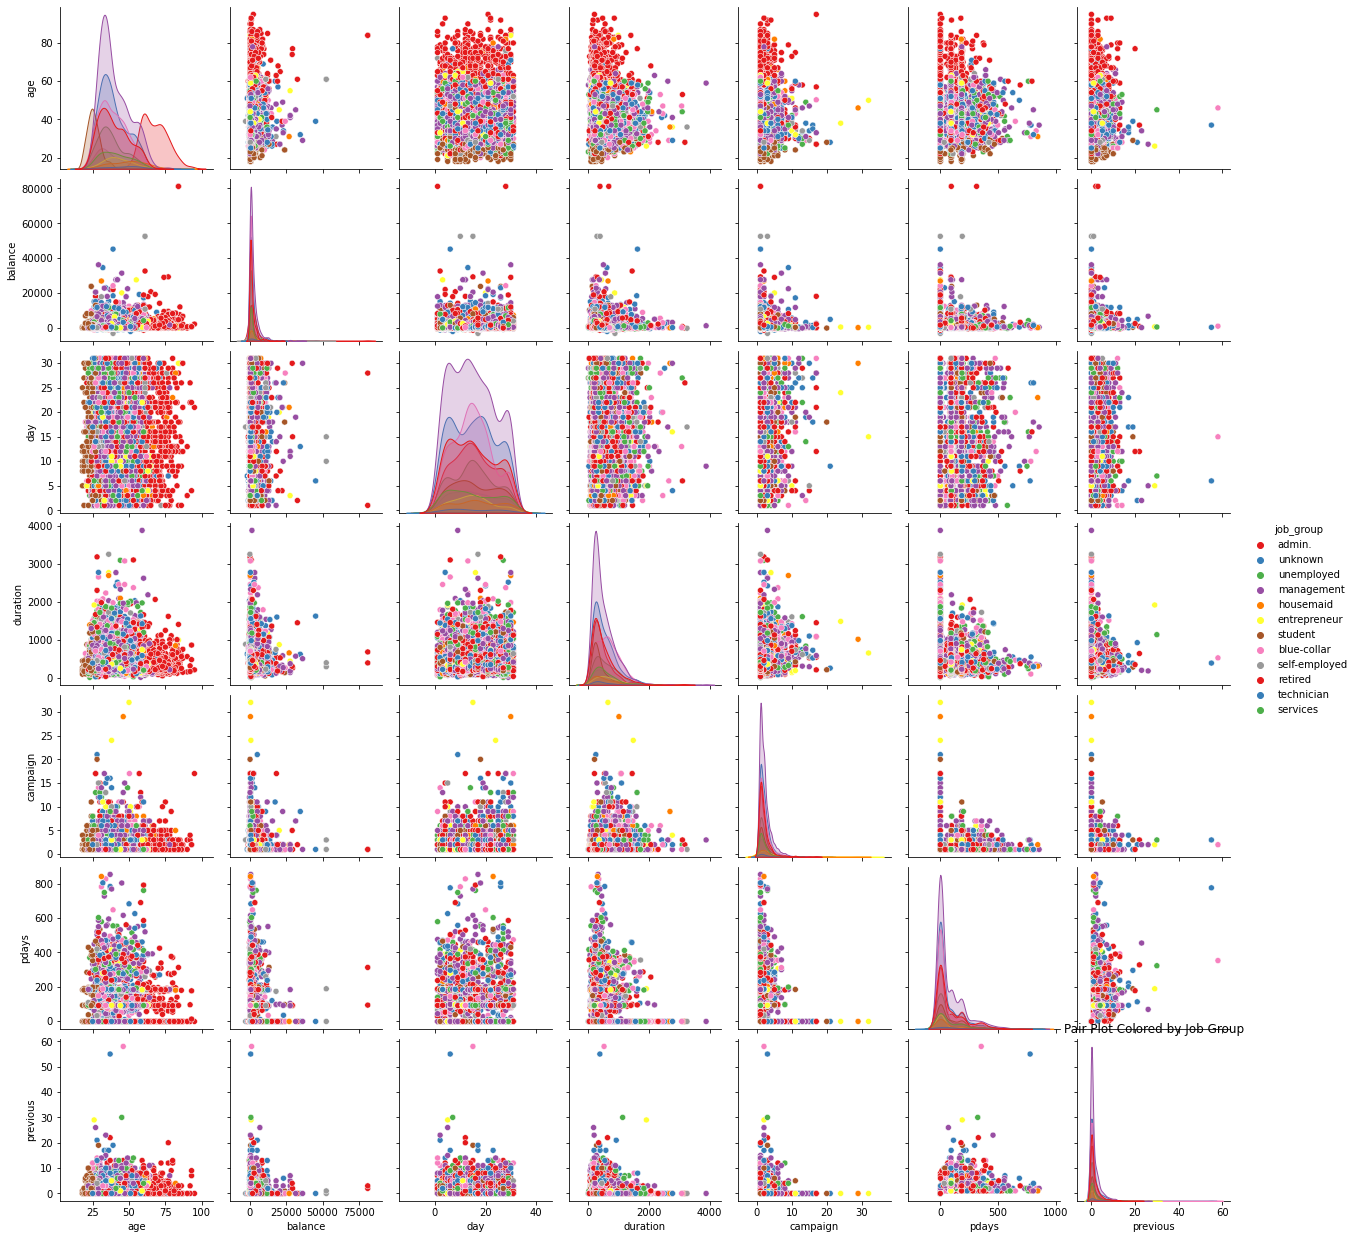

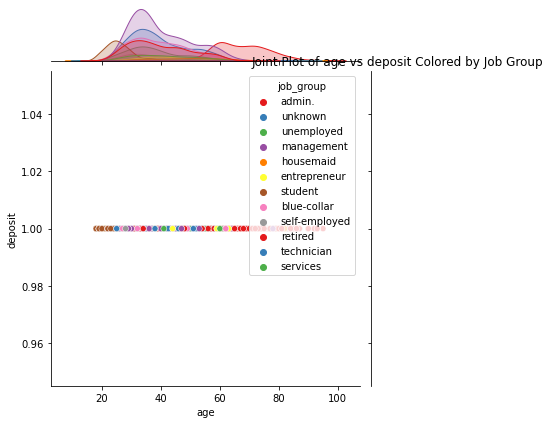

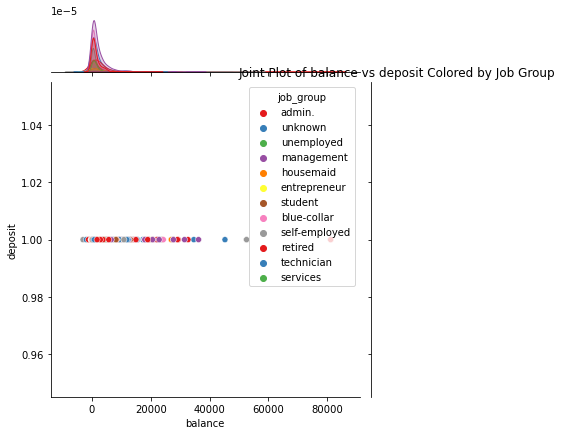

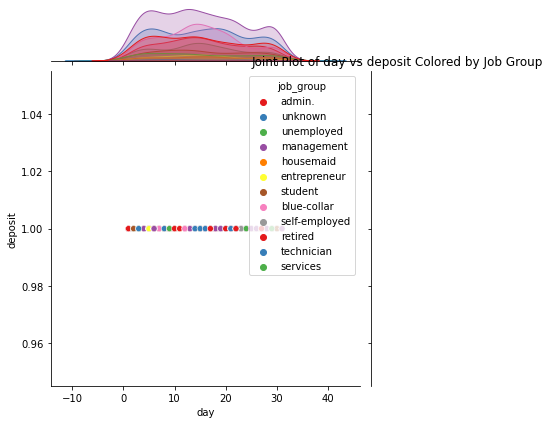

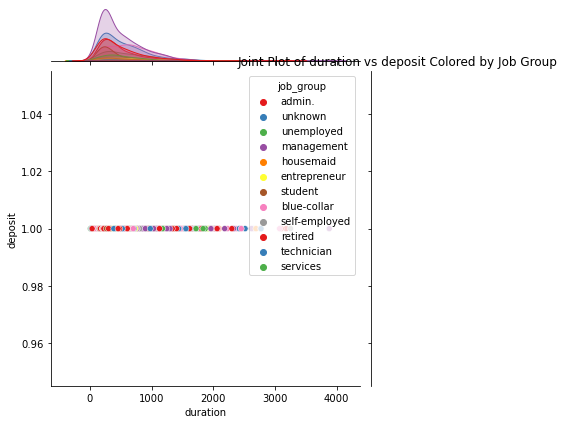

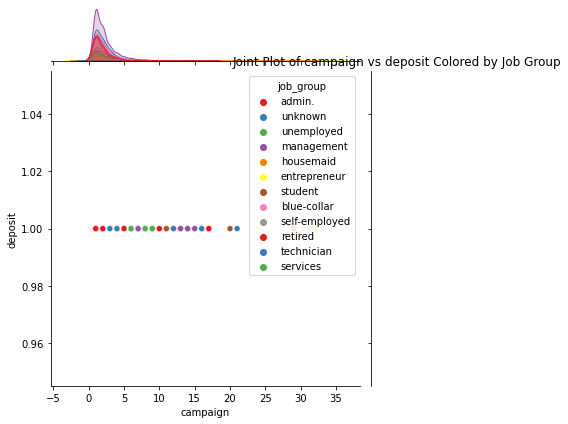

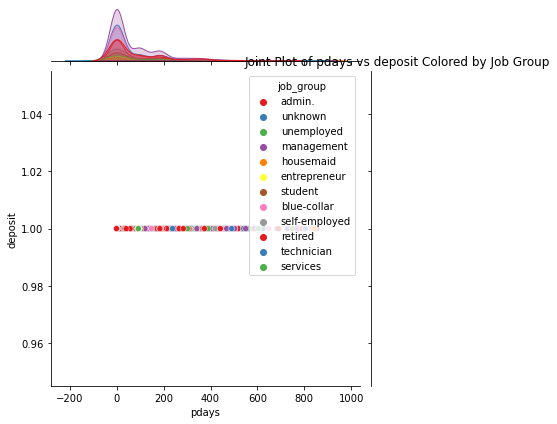

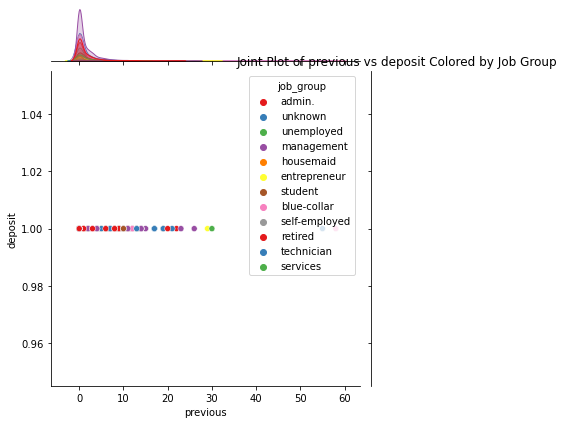

In [69]:
plot_deposit_yes_job_groups(df)